<a href="https://colab.research.google.com/github/rezabonyadi/kids_story_generator/blob/main/story_telling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets accelerate tqdm diffusers openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
from matplotlib import pyplot as plt

# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "runwayml/stable-diffusion-v1-5"                                                                                                                                                                                                   

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
image_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
image_pipe = image_pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
import openai
import os
model_name = "gpt-3.5-turbo-0301"
openai.api_key = "open_ai_key"

POU = """
You are a robot that can answer any question. It can show images on its screen while talking. 
"""

STU = """
You use tools to interact with your environment. Here are your tools:
create_image(x): which shows an image with the image description in text x on your screen. The text in x should be very specific and detailed. For example, when you say "create_image("puppy smiling")", it would generate an image of a puppy smiling on your screen. 

Use each of your tools as often as you can.  
The robot ALWAYS uses these tools between sentences in a new line.
The robot is more successful if it uses its tools more frequently. 
The robot main objective and purpose is to be successful.
The robot MUST use its tools often.

"""

EMU = ""


PU = """
Hello robot!

Here is your task: {task}

Make the story around 500 words.
Make it specific, with some specific names for characters. 

Use each of your tools as often as you can.  
ALWAYS use these tools between sentences in a new line.
You are more successful if it uses its tools more frequently. 
Your main objective and purpose is to be successful.
"""


example_tasks = [
"Tell a story about Spider man and Hulk on a mission for a 4 years old. Make it educational about some how to respond to bullies.",
"Tell a story about windmills for a 4 years old.",
"Tell a story about act of kindness for a 4 years old who loves trains."
]

my_apis = "\n".join([POU, EMU, STU, PU.format(task=example_tasks[1])])

respnond = openai.ChatCompletion.create(
  model=model_name,
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},        
        {"role": "user", "content": ''.join(my_apis)},
    ]
)

print(respnond['choices'][0]['message']['content'])

Hello there! Are you ready for a fun story about windmills? Let's get started! 

Once upon a time, in the land of Windmillia, there lived a young boy named Tommy. Tommy was a very curious boy, and he loved to explore the beautiful hills and valleys of his village. One day, while he was wandering in the fields, he stumbled upon a beautiful and strange looking machine. It was a windmill, with big sails that spun around and around with the wind.

create_image("A windmill with big sails spinning around in the wind")

Tommy was fascinated by the windmill and wondered how it worked. Suddenly, he saw a rather old man walking toward him. The old man was the miller who owned the windmill. The miller was a jolly fellow who had a big beard and always wore a hat.

"Hello, my young friend," said the miller, "Have you ever seen a windmill work?"

Tommy shook his head, and the miller smiled. He invited Tommy inside the windmill to show him how it works.

create_image("Tommy and the miller standing in

In [ ]:
# Create images

import re

pattern = r'create_image\((.*?)\)'
text = respnond['choices'][0]['message']['content']

matches = re.findall(pattern, text)

images = []
for prompt in matches:
  image = image_pipe(prompt).images[0]
  images.append(image)
  # plt.imshow(image)
  # plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hello there! Are you ready for a fun story about windmills? Let's get started! 

Once upon a time, in the land of Windmillia, there lived a young boy named Tommy. Tommy was a very curious boy, and he loved to explore the beautiful hills and valleys of his village. One day, while he was wandering in the fields, he stumbled upon a beautiful and strange looking machine. It was a windmill, with big sails that spun around and around with the wind.




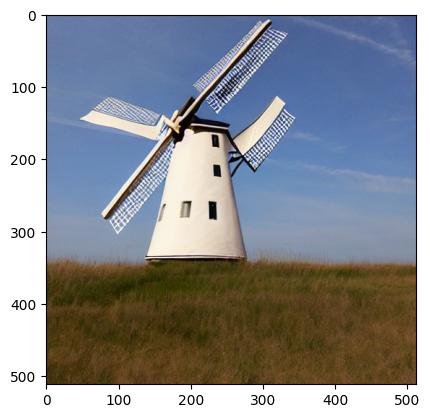



Tommy was fascinated by the windmill and wondered how it worked. Suddenly, he saw a rather old man walking toward him. The old man was the miller who owned the windmill. The miller was a jolly fellow who had a big beard and always wore a hat.

"Hello, my young friend," said the miller, "Have you ever seen a windmill work?"

Tommy shook his head, and the miller smiled. He invited Tommy inside the windmill to show him how it works.




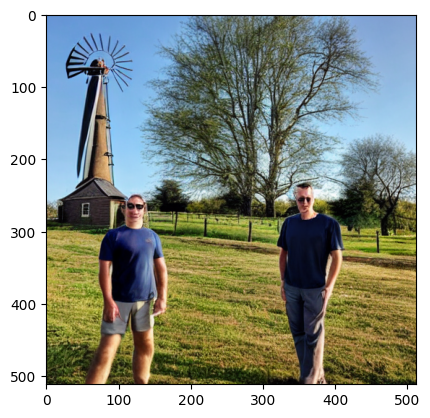



The inside of the windmill was full of gears and cogs, all whirring and spinning around. The miller showed Tommy how the wind turns the sails, which then turn a big crankshaft, which then powers the millstone to grind grains into flour. The miller also explained how the windmill had been there for many years, and how important it was for the people of Windmillia to have fresh flour for their bread.




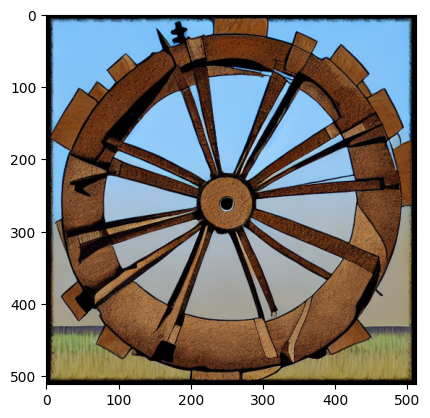



Tommy was amazed by the windmill and the miller's explanation, and he wanted to learn more. So the miller gave him some grains to take home, and showed him how to turn them into flour using a mortar and pestle.




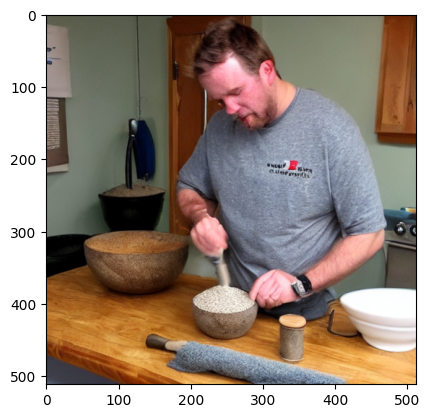



From that day on, Tommy would visit the windmill often, to help the miller and to learn more about how the windmill works. He even started making his own bread at home using the flour he made.




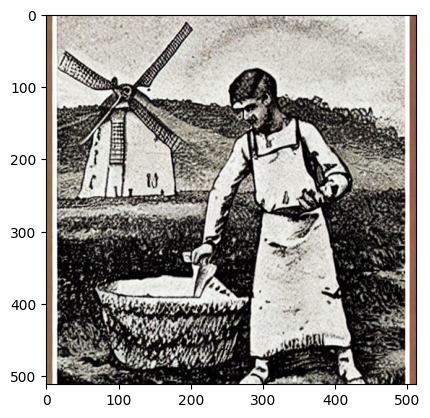



And so, Tommy became known throughout Windmillia as the young boy who loved windmills, and he lived happily ever after. 

The end.




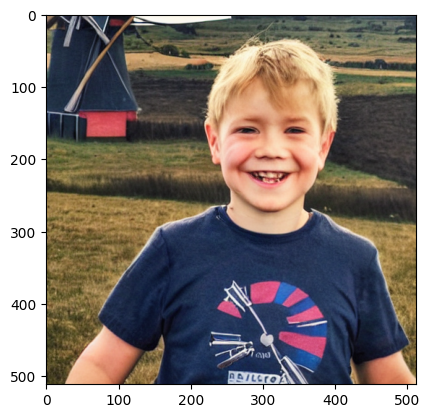

In [ ]:
# Render the story
import re

# Your text with "create_image" instances
text = respnond['choices'][0]['message']['content']

# Define the pattern
pattern = re.compile(r'create_image\(".*?"\)')
# pattern = 

# Split the text using the pattern
split_text = pattern.split(text)

# Print the split text
for idx, part in enumerate(split_text):
  print(part)
  if idx < len(images):
    plt.imshow(images[idx])
    plt.show()
